In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


In [2]:
df = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
df.Class.value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

#### Partition Dataset

In [6]:
y = df["Class"]
X = df.drop(['Class', 'Amount', 'Time'], axis = 1)

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, shuffle=True)
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (256326, 28)
X_test: (28481, 28)
y_train: (256326,)
y_test: (28481,)


In [8]:
X_train

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
17196,1.226643,0.101988,-0.087072,0.111524,-0.281992,-1.356027,0.469050,-0.371725,-0.153672,-0.145105,...,0.264953,0.019692,-0.355100,-1.153663,0.109793,0.420318,0.197932,0.699218,-0.114861,0.007583
139378,1.124848,0.125602,0.249962,0.489744,-0.040386,0.167561,-0.247614,0.284736,-0.067302,-0.170139,...,-0.625413,-0.204465,-0.192467,-0.576819,0.190343,-0.357451,0.000870,0.139971,-0.000993,0.011505
119668,-0.307902,1.003715,1.404277,0.592627,0.311014,-0.382106,0.531393,-0.015292,-0.758638,-0.511597,...,0.563779,0.125220,-0.131802,-0.329268,0.046990,0.057413,-0.656960,0.193192,0.142038,0.157501
253676,2.174919,-1.535441,-0.726428,-1.430792,-1.517258,-0.751038,-1.155344,-0.180811,-1.111885,1.536101,...,-0.327292,-0.334351,-0.112766,0.050018,0.294666,1.123322,-0.306025,-0.241343,0.006553,-0.027567
266881,-2.221556,1.261987,2.047642,4.659268,-0.535941,4.542044,-3.715525,-5.311701,-0.955321,0.200601,...,1.872711,0.895990,-1.820388,0.873723,-2.648598,-0.162180,-0.492111,0.601490,0.627030,0.088289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,1.173488,0.100792,0.490512,0.461596,-0.296377,-0.213165,-0.165254,0.119221,-0.114199,0.079128,...,-0.182494,-0.157534,-0.186027,-0.574283,0.161405,-0.006140,0.091444,0.109235,-0.020922,0.003967
259178,-0.775981,0.144023,-1.142399,-1.241113,1.940358,3.912076,-0.466107,1.360620,0.400697,-0.654029,...,0.094703,-0.295730,0.037078,-0.019575,0.241830,0.682820,-1.635109,-0.770941,0.066006,0.137056
131932,-0.146609,0.992946,1.524591,0.485774,0.349308,-0.815198,1.076640,-0.395316,-0.491303,-0.212753,...,-0.229614,0.007155,0.052649,0.354089,-0.291198,0.402849,0.237383,-0.398467,-0.121139,-0.196195
146867,-2.948638,2.354849,-2.521201,-3.798905,1.866302,2.727695,-0.471769,2.217537,0.580199,-0.027572,...,-1.143752,0.417396,-0.332759,-1.047514,0.143326,0.678869,0.319710,0.426309,0.496912,0.335822


#### Checking for Fraudulent records

In [9]:
print("Fraud in y_train:", len(np.where(y_train == 1)[0]))
print("Fraud in y_test",len(np.where(y_test == 1)[0]))

Fraud in y_train: 446
Fraud in y_test 46


#### Using the Logistic Regression Model

In [10]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train, y_train)

LogisticRegression()

In [11]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 0, ..., 0, 0, 0])

#### Using teh Confusion Matrix

In [12]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[28429,     6],
       [   17,    29]])

#### Visualizing Confusion Matrix

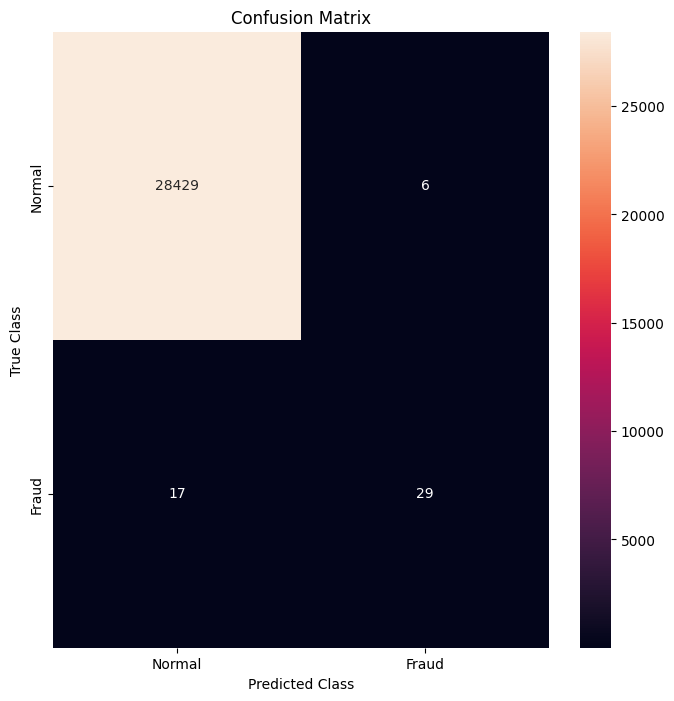

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

LABELS = ["Normal", "Fraud"]

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

#### Applying Hyperparameter selection to the existing Model

In [14]:
#from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight = 'balanced')#it balances out the training model by paying attention to the minority clause

model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

In [15]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 0, ..., 0, 0, 0])

In [16]:
confusion_matrix(y_test, y_pred)

array([[27792,   643],
       [    4,    42]])

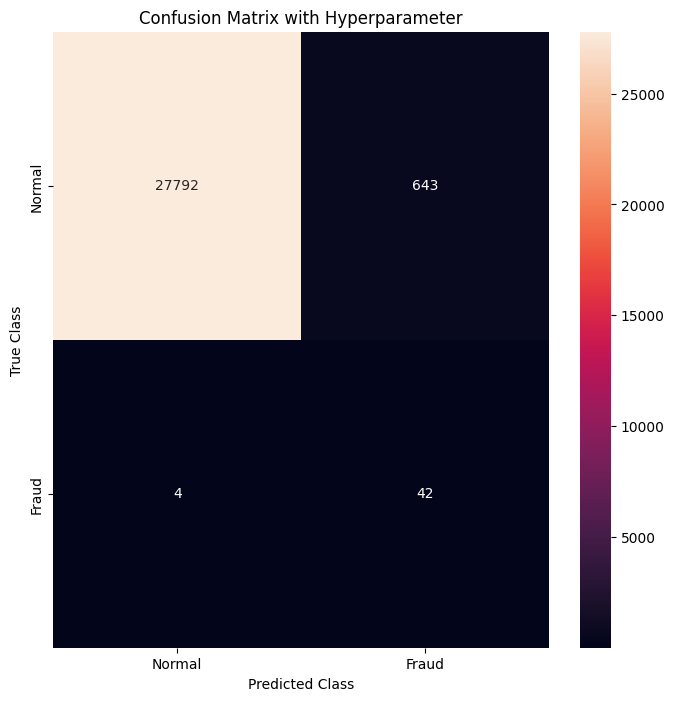

In [17]:
LABELS = ["Normal", "Fraud"]

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d")
plt.title("Confusion Matrix with Hyperparameter")
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

#### Modifying the balance Hyoerparameter attribute to improve the Model

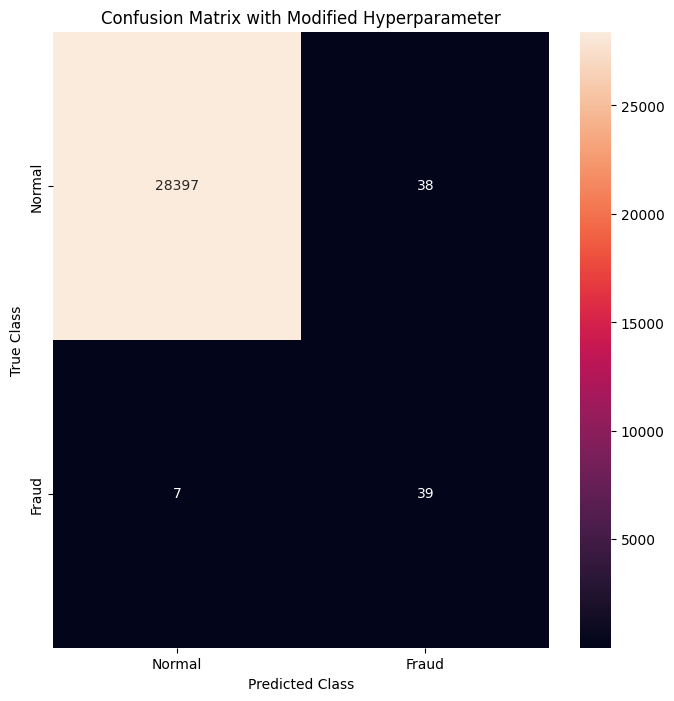

In [18]:
model = LogisticRegression(class_weight = {0:1, 1:50})#Declaring Majority as it's but increasing the eemphasis on the Minority class by 50
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
                                           
LABELS = ["Normal", "Fraud"]

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d")
plt.title("Confusion Matrix with Modified Hyperparameter")
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

#### Understanding the Logistic Rgression Model

In [19]:
model.classes_

array([0, 1])

In [20]:
model.coef_ #coefficients of the model

array([[ 0.10179412, -0.04556525, -0.00151594,  0.78814598,  0.10185048,
        -0.20974895,  0.0276318 , -0.34007967, -0.163613  , -0.47448934,
         0.23855576, -0.6078542 , -0.2676836 , -0.72537274, -0.11621659,
        -0.29641596, -0.07942151, -0.14625997, -0.08182597, -0.09755405,
         0.24723738,  0.36681899, -0.17403491,  0.09602893,  0.04538999,
        -0.37421553,  0.00850048,  0.11078863]])

In [21]:
model.intercept_

array([-5.44784228])

In [22]:
model.predict_proba(X_test)

array([[2.70452549e-11, 1.00000000e+00],
       [9.99091252e-01, 9.08747641e-04],
       [9.98906809e-01, 1.09319086e-03],
       ...,
       [9.99613331e-01, 3.86668714e-04],
       [9.97131488e-01, 2.86851240e-03],
       [9.89788795e-01, 1.02112046e-02]])

**Using Shap to analyze the impact of Data points on the Model**

In [23]:
import shap
shap.initjs()

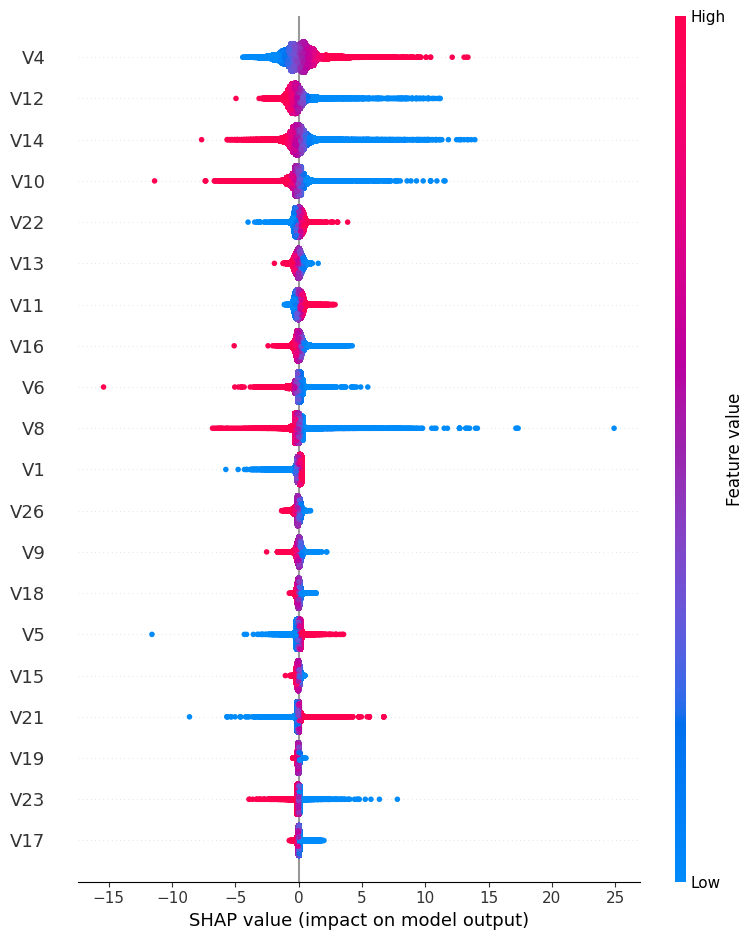

In [24]:
explainer = shap.LinearExplainer(model, X_train)
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values, X)

#### Taring an XGBoost Model

In [25]:
import xgboost as xgb
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [26]:
y_pred = model.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[28433,     2],
       [   11,    35]])

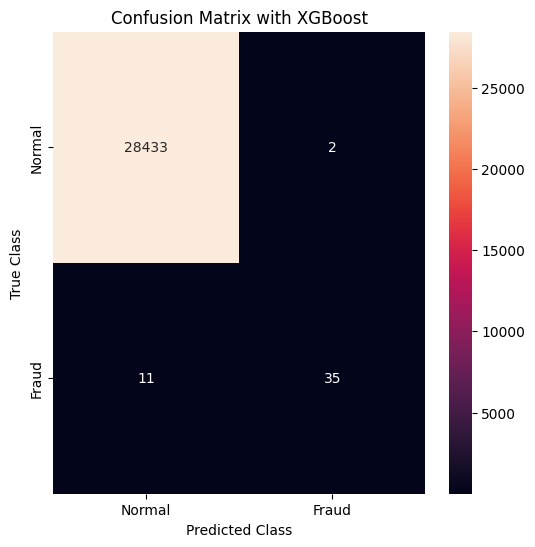

In [27]:
LABELS = ["Normal", "Fraud"]

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d")
plt.title("Confusion Matrix with XGBoost")
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

#### Improving XGBoost Model with a Hyperparameter

In [28]:
model = xgb.XGBClassifier(scale_pos_weight=100)
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [29]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 0, ..., 0, 0, 0])

In [30]:
confusion_matrix(y_test, y_pred)

array([[28434,     1],
       [    9,    37]])

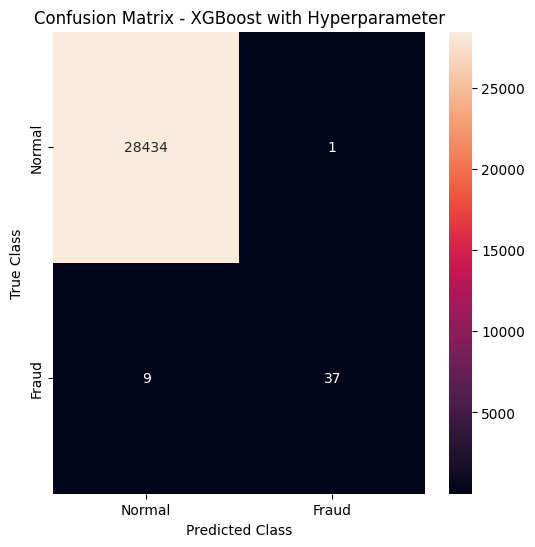

In [31]:
LABELS = ["Normal", "Fraud"]

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d")
plt.title("Confusion Matrix - XGBoost with Hyperparameter")
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

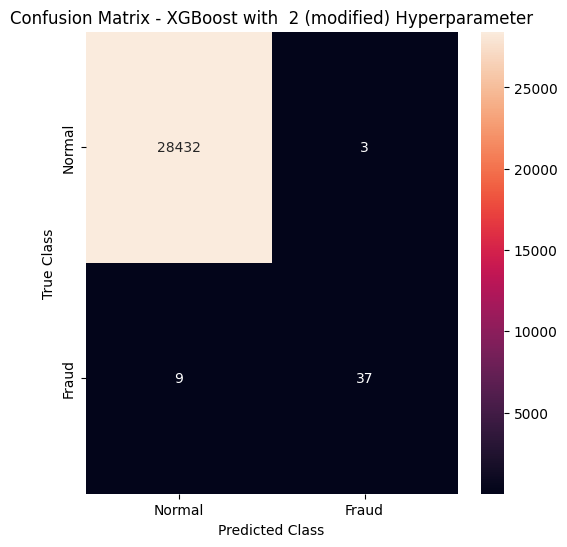

In [32]:
model = xgb.XGBClassifier(max_depth=5, scale_pos_weight=100)
# max_depth attribute gives the maximum depth to whicn the tree will be built
# It is effective in reducing over fitting
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

conf_matrix_xgb = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix_xgb, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d")
plt.title("Confusion Matrix - XGBoost with  2 (modified) Hyperparameter")
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

In [33]:
model.classes_

array([0, 1])

In [34]:
model.feature_importances_

array([0.01665451, 0.00735362, 0.01340836, 0.04622954, 0.00960177,
       0.00644468, 0.01676936, 0.01844469, 0.00889986, 0.0205424 ,
       0.010468  , 0.03619935, 0.0105742 , 0.6156912 , 0.00799384,
       0.00911339, 0.0492625 , 0.00996983, 0.01294991, 0.01177547,
       0.01087385, 0.00901071, 0.0056332 , 0.0064939 , 0.00773803,
       0.00990466, 0.00401786, 0.00798135], dtype=float32)

In [35]:
print(conf_matrix_xgb[0][0])
print(conf_matrix_xgb[0][1])
print(conf_matrix_xgb[1][0])
print(conf_matrix_xgb[1][1])

28432
3
9
37


In [36]:
cost_tn = 1
cost_fp = 10
cost_fn = 100
cost_tp = 1

In [37]:
total_cost_of_fraud_xgb = (conf_matrix_xgb[0][0] * cost_tn) + (conf_matrix_xgb[0][1] * cost_fp) + (conf_matrix_xgb[1][0] * cost_fn) + (conf_matrix_xgb[1][1] * cost_tp)
total_cost_of_fraud_xgb

29399

#### Accuracy Paradox

In [38]:
from sklearn.metrics import accuracy_score

y_pred_acc = np.zeros(len(y_test))

print('Accuracy Score:', round(accuracy_score(y_test, y_pred_acc), 5))

Accuracy Score: 0.99838


#### Scikit Learn Performance Metrics

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, shuffle=True)
model_xgb = xgb.XGBClassifier(max_depth=5, scale_pos_weight=100)
model_xgb.fit(X_train, y_train)
y_pred = model_xgb.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[28432,     3],
       [    9,    37]])

In [40]:
from sklearn.metrics import (classification_report, precision_score, recall_score, average_precision_score, roc_auc_score, f1_score, matthews_corrcoef)

In [41]:
#Precision is the proportion of correctly predicted fraudulent instances among all instances predicted as fraudulent
#TP / TP + FN

recall_score(y_test, y_pred)

0.8043478260869565

In [42]:
#F1 score is the harmonic balance of precision and recall (can be weighed more towards P or R if need be)

f1_score(y_test, y_pred)

0.8604651162790697

In [43]:
# AUROC/AUC = Area under the Receiver Operating Characteristic curve
# Plot the TPR (Recall) and FPR at various classification threshold
#FPR = FP / FP +TN

roc_auc_score(y_test, y_pred)

0.9021211611532021

In [44]:
# AUPRC = Area under the Precision-Recall curve
# Better alternative to AUC as it doesn't include TN which influences the scores significantly in highly imbalanced data
# calculates the area under the curve at vatious classficatiob thresholds

average_precision_score(y_test, y_pred)

0.7443377392708793

In [45]:
#Classification report summarizes the classification metrics at the class and overall level

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28435
           1       0.93      0.80      0.86        46

    accuracy                           1.00     28481
   macro avg       0.96      0.90      0.93     28481
weighted avg       1.00      1.00      1.00     28481



In [46]:
# Probability of being Fraudulent

y_pred = model_xgb.predict_proba(X_test)[:,1]
y_pred

array([9.9995875e-01, 3.7563120e-07, 2.4110450e-05, ..., 2.7539747e-06,
       1.4674832e-07, 4.5847932e-07], dtype=float32)

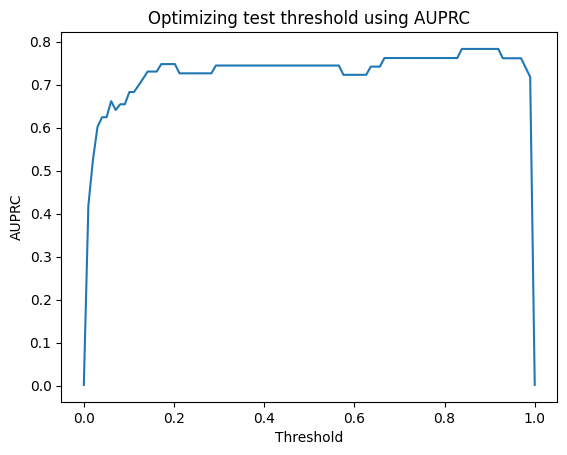

In [47]:
from sklearn.metrics import average_precision_score

threshold_list = []
auprc_list = []
thresholds = np.linspace(0, 1, 100)

for threshold in thresholds:
    y_pred_thresh = [1 if e > threshold else 0 for e in y_pred]
    threshold_list.append(threshold)
    #AUPRC
    auprc_score = average_precision_score(y_test, y_pred_thresh)
    auprc_list.append(auprc_score)

# plot curve
threshold_df = pd.DataFrame(threshold_list, auprc_list).reset_index()
threshold_df.columns = ['AUPRC', 'Threshold']

plt.plot(threshold_df['Threshold'], threshold_df['AUPRC'])
plt.title("Optimizing test threshold using AUPRC")
plt.xlabel('Threshold')
plt.ylabel('AUPRC')
plt.savefig('Optimizing threshold using AUPRC')
plt.show()
    

In [48]:
threshold_df.sort_values(by='AUPRC', ascending=False)

,AUPRC,Threshold
83,0.782960,0.838384
90,0.782960,0.909091
84,0.782960,0.848485
85,0.782960,0.858586
86,0.782960,0.868687
...,...,...
3,0.601432,0.030303
2,0.525090,0.020202
1,0.418793,0.010101
0,0.001615,0.000000


**Threshold Optimization using Cost of Fraud**

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, shuffle=True)
model_xgb = xgb.XGBClassifier(max_depth=5, scale_pos_weight=100)
model_xgb.fit(X_train, y_train)
y_pred = model_xgb.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[28432,     3],
       [    9,    37]])

In [50]:
y_pred = model_xgb.predict_proba(X_test)[:,1]
y_pred

array([9.9995875e-01, 3.7563120e-07, 2.4110450e-05, ..., 2.7539747e-06,
       1.4674832e-07, 4.5847932e-07], dtype=float32)

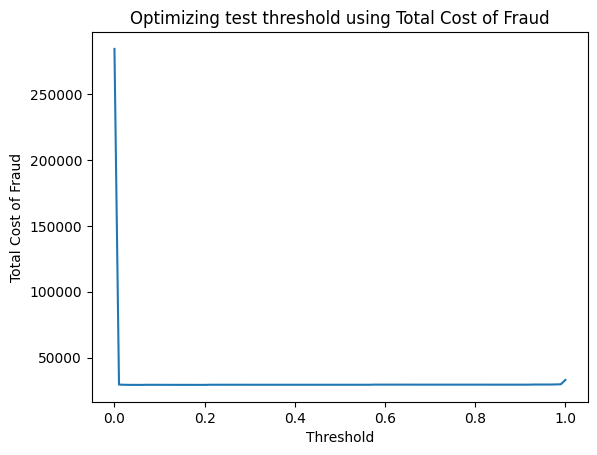

In [51]:
from sklearn.metrics import average_precision_score

threshold_list = []
tcf_list = []
cost_tn = 1
cost_fp = 10
cost_fn = 100
cost_tp = 1
thresholds = np.linspace(0, 1, 100)

for threshold in thresholds:
    y_pred_thresh = [1 if e > threshold else 0 for e in y_pred]
    threshold_list.append(threshold)
    
    # Total Cost of Fraud
    conf_matrix_xgb = confusion_matrix(y_test, y_pred_thresh)
    tcf_score = (conf_matrix_xgb[0][0] * cost_tn) + (conf_matrix_xgb[0][1] * cost_fp) + (conf_matrix_xgb[1][0] * cost_fn) + (conf_matrix_xgb[1][1]*cost_tp)
    tcf_list.append(tcf_score)

# plot curve
threshold_df = pd.DataFrame(threshold_list, tcf_list).reset_index()
threshold_df.columns = ['TCF', 'Threshold']

plt.plot(threshold_df['Threshold'], threshold_df['TCF'])
plt.title("Optimizing test threshold using Total Cost of Fraud")
plt.xlabel('Threshold')
plt.ylabel('Total Cost of Fraud')
plt.savefig('Optmizing threshold using Total Cost of Fraud')
plt.show()

In [52]:
threshold_df.sort_values(by='TCF', ascending=True)

,TCF,Threshold
6,29273,0.060606
4,29300,0.040404
5,29300,0.050505
18,29309,0.181818
20,29309,0.202020
...,...,...
95,29570,0.959596
97,29669,0.979798
98,29768,0.989899
99,33035,1.000000
